In [2]:
import importlib
import sys
import numpy as np
import matplotlib.pyplot as plt
from data import get_temperatures, interpolate_temperature

In [3]:
_ = importlib.reload(sys.modules['data'])
from data import get_temperatures, interpolate_temperature

### Get Ambient Temperature data from Niagara

In [4]:
# path to data directories (the directories named by 1st 5 digits of unix time)
path2dir_100 = '/project/s/sievers/prizm/marion2022/prizm-100/data_100MHz/temperatures'
path2dir_70 = '/project/s/sievers/prizm/marion2022/prizm-70/data_70MHz/temperatures'

In [5]:
ambient_100 = get_temperatures('100MHz', path2dir_100, verbose=True)
ambient_70 = get_temperatures('70MHz', path2dir_70, verbose=True)

1635557751 100MHz array mismatch by: 3
1635564966 100MHz array mismatch by: 2
1635579397 100MHz array mismatch by: 3
1635593827 100MHz array mismatch by: 2
1637299229 100MHz array mismatch by: 2
1637310045 100MHz array mismatch by: 2
1637028242 70MHz array mismatch by: 2
1637031846 70MHz array mismatch by: 2
1637057099 70MHz array mismatch by: 2
1637075123 70MHz array mismatch by: 3
1637082342 70MHz array mismatch by: 2
1637089561 70MHz array mismatch by: 2
1637096776 70MHz array mismatch by: 3
1637310052 70MHz array mismatch by: 2
1637317280 70MHz array mismatch by: 2
1637328101 70MHz array mismatch by: 2
1637335319 70MHz array mismatch by: 2


In [6]:
LNA_bot_100EW = get_temperatures('100MHz', path2dir_100, temp_type='100EW_bot_lna')
LNA_bot_100NS = get_temperatures('100MHz', path2dir_100, temp_type='100NS_bot_lna')
LNA_bot_70EW = get_temperatures('70MHz', path2dir_70, temp_type='70EW_bot_lna')
LNA_bot_70NS = get_temperatures('70MHz', path2dir_70, temp_type='70NS_bot_lna')

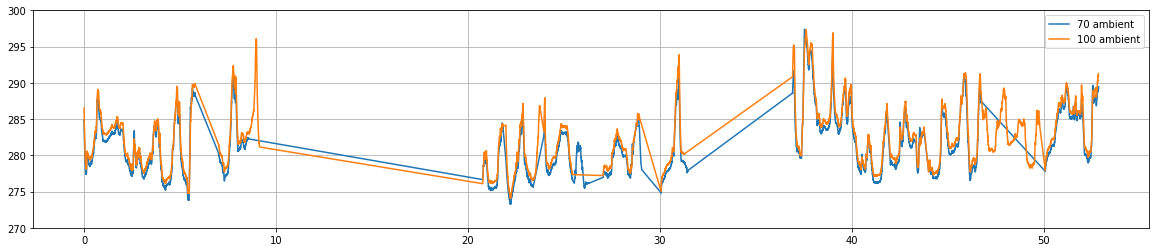

In [7]:
plt.figure(figsize=(20,4))
plt.grid()
# plt.xlim(0,5)
plt.ylim(270,300)
plt.plot((ambient_70['time_sys_start'] - ambient_70['time_sys_start'][0]) / 24/3600, \
         ambient_70['temp_ambient'], label='70 ambient')
plt.plot((ambient_100['time_sys_start'] - ambient_100['time_sys_start'][0]) / 24/3600, \
         ambient_100['temp_ambient'], label='100 ambient')

# plt.plot((LNA_top_70EW['time_sys_start'] - LNA_top_70EW['time_sys_start'][0]) / 24/3600, \
#          LNA_top_70EW['temp_70EW_top_lna'], label='70EW top LNA')
# plt.plot((LNA_top_70NS['time_sys_start'] - LNA_top_70NS['time_sys_start'][0]) / 24/3600, \
#          LNA_top_70NS['temp_70NS_top_lna'], label='70NS top LNA')
# plt.plot((LNA_top_100EW['time_sys_start'] - LNA_top_100EW['time_sys_start'][0]) / 24/3600, \
#          LNA_top_100EW['temp_100EW_top_lna'], label='100EW top LNA')
# plt.plot((LNA_top_100NS['time_sys_start'] - LNA_top_100NS['time_sys_start'][0]) / 24/3600, \
#          LNA_top_100NS['temp_100NS_top_lna'], label='100NS top LNA')

# plt.plot((LNA_bot_70EW['time_sys_start'] - LNA_bot_70EW['time_sys_start'][0]) / 24/3600, \
#          LNA_bot_70EW['temp_70EW_bot_lna'], label='70EW bot LNA')
# plt.plot((LNA_bot_70NS['time_sys_start'] - LNA_bot_70NS['time_sys_start'][0]) / 24/3600, \
#          LNA_bot_70NS['temp_70NS_bot_lna'], label='70NS bot LNA')
# plt.plot((LNA_bot_100EW['time_sys_start'] - LNA_bot_100EW['time_sys_start'][0]) / 24/3600, \
#          LNA_bot_100EW['temp_100EW_bot_lna'], label='100EW bot LNA')
# plt.plot((LNA_bot_100NS['time_sys_start'] - LNA_bot_100NS['time_sys_start'][0]) / 24/3600, \
#          LNA_bot_100NS['temp_100NS_bot_lna'], label='100NS bot LNA')

plt.legend()

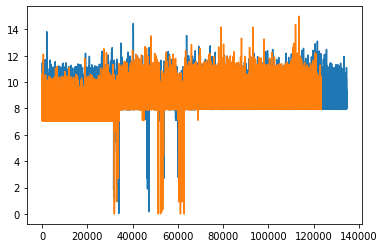

In [443]:
# check integration times look normal
plt.plot(ambient_100['time_sys_stop'] - ambient_100['time_sys_start'])
plt.plot(ambient_70['time_sys_stop'] - ambient_70['time_sys_start'])
#### discard the few low intergrations?

In [444]:
# calculate time stamp as average of start & stop times
time_sys_100 = (ambient_100['time_sys_stop'] + ambient_100['time_sys_start']) / 2
time_sys_70 = (ambient_70['time_sys_stop'] + ambient_70['time_sys_start']) / 2

### Compare time coverage with antenna data

In [404]:
instrument = '100MHz'
year = '2021'

channel = 'NS'
path2file = f'../Data/{year}/{instrument[:-3]}/{channel}/'
file_ending = f'_{year}_{instrument[:-3]}{channel}.npy'
with open(path2file + 'systime' + file_ending, 'rb') as f:
    systime_EW = np.load(f)
    
channel = 'EW'
path2file = f'../Data/{year}/{instrument[:-3]}/{channel}/'
file_ending = f'_{year}_{instrument[:-3]}{channel}.npy'
with open(path2file + 'systime' + file_ending, 'rb') as f:
    systime_NS = np.load(f)
    
instrument = '70MHz'
year = '2021'

channel = 'EW'
path2file = f'../Data/{year}/{instrument[:-3]}/{channel}/'
file_ending = f'_{year}_{instrument[:-3]}{channel}.npy'
with open(path2file + 'systime' + file_ending, 'rb') as f:
    systime_70 = np.load(f)

### Interpolate

In [445]:
T_amb_100EW, temp_time_EW, interp_inds = interpolate_temperature(ambient_100['temp_ambient'], time_sys_100, systime_EW)
T_amb_100NS, temp_time_NS, interp_inds = interpolate_temperature(ambient_100['temp_ambient'], time_sys_100, systime_NS)
T_amb_70EW, temp_time_70, interp_inds = interpolate_temperature(ambient_70['temp_ambient'], time_sys_70, systime_70)

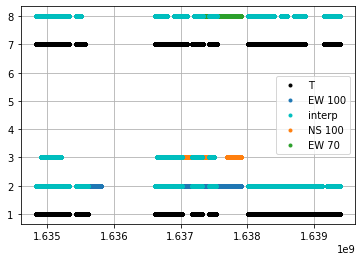

In [446]:
# plt.figure(figsize=(5,2))
plt.grid()
plt.plot(time_sys_100, np.ones(len(time_sys_100)), 'k.', label='T')
plt.plot(systime_EW, np.ones(len(systime_EW))*2, '.', label='EW 100')
plt.plot(temp_time_EW, np.ones(len(T_amb_100EW))*2, 'c.', label='interp')
plt.plot(systime_NS, np.ones(len(systime_NS))*3, '.', label='NS 100')
plt.plot(temp_time_NS, np.ones(len(T_amb_100NS))*3, 'c.', )

plt.plot(time_sys_70, np.ones(len(time_sys_70))*7, 'k.')
plt.plot(systime_70, np.ones(len(systime_70))*8, '.', label='EW 70')
plt.plot(temp_time_70, np.ones(len(T_amb_70EW))*8, 'c.')
plt.legend()

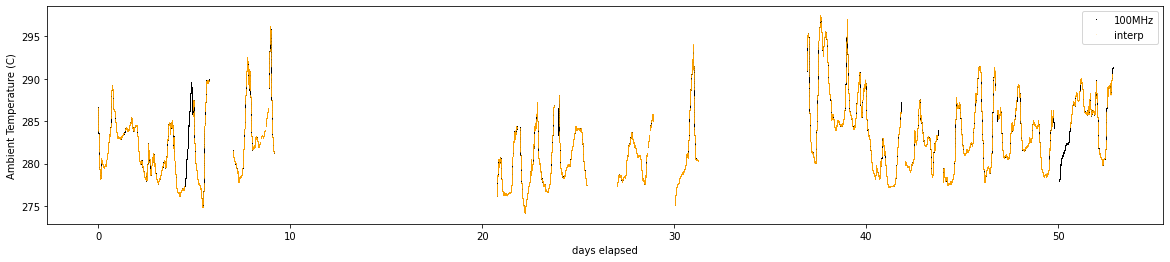

In [447]:
plt.figure(figsize=(20,4))
plt.ylabel('Ambient Temperature (C)')
plt.xlabel('days elapsed')
# plt.xlim(0,5)
# plt.ylim(0,25)
plt.plot((time_sys_100 - time_sys_100[0])/24/3600, ambient_100['temp_ambient'], 'k,', label='100MHz')
plt.plot((temp_time_EW - time_sys_100[0])/24/3600, T_amb_100EW, ',', color='orange', alpha=0.2, label='interp')
# plt.plot((time_sys_70 - time_sys_100[0])/24/3600, T_amb_70, ',', label='70MHz')
plt.legend()

#### rough work

#### compare with previous years

In [57]:
classification_catalogue = {
    'data_100MHz': '100MHz',
    'data_70MHz': '70MHz',
}

file_catalogue = {
    'time_start_sys_therms.raw': ('float',['Temperature'],'time_sys_start'),
    'time_stop_sys_therms.raw': ('float',['Temperature'],'time_sys_stop'),
    'temp_100_ambient.raw': ('float',['Temperature'],'temp_ambient'),
    'temp_70_ambient.raw': ('float',['Temperature'],'temp_ambient'),
}
unix_day_start = 0
unix_day_stop = 0

In [ ]:
# path to data directories (the directories named by 1st 5 digits of unix time)
path2dir_100 = '/project/s/sievers/prizm/marion2019/prizm-100/data_100MHz/temperatures'
path2dir_70 = '/project/s/sievers/prizm/marion2019/prizm-70/data_70MHz/temperatures'

In [ ]:
T_amb_100, time_sys_start_100, time_sys_stop_100 = get_ambient_temperatures('100MHz', path2dir_100, file_catalogue=file_catalogue, \
                                                                            unix_day_start=unix_day_start, unix_day_stop=unix_day_stop, verbose=True)
T_amb_70, time_sys_start_70, time_sys_stop_70 = get_ambient_temperatures('70MHz', path2dir_70, file_catalogue=file_catalogue, \
                                                                         unix_day_start=unix_day_start, unix_day_stop=unix_day_stop, verbose=True)

In [95]:
data = Data.via_metadatabase(categories=['Temperature'],
                             instruments=['100MHz', '70MHz'],
                             channels=['EW', 'NS'],
                             intervals=[(1523600000.0,1557000000.0),],
                             quality=[1, 0, 'NULL'],
                             integrity=[1, 0, 'NULL'],
                             completeness=[1, 0, 'NULL'])

In [131]:
test = np.delete(data['100MHz']['EW']['time_start_sys_therms'], np.where(data['100MHz']['EW']['time_start_sys_therms'] < 1e-16)[0])

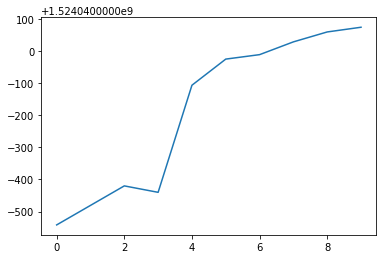

In [135]:
plt.plot(test[:10])

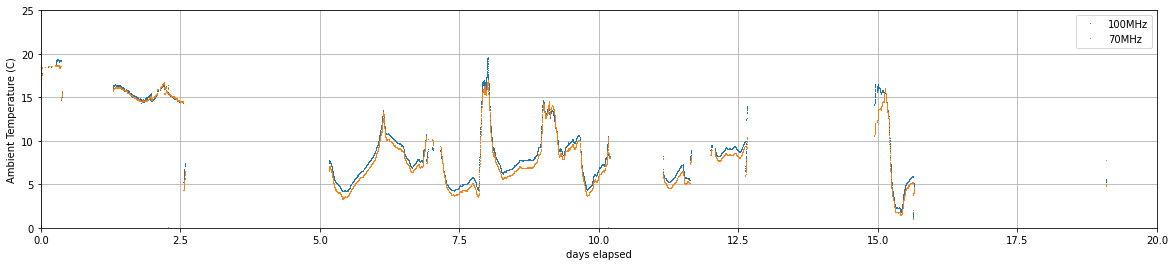

In [271]:
plt.figure(figsize=(20,4))
plt.ylabel('Ambient Temperature (C)')
plt.xlabel('days elapsed')
plt.grid()
plt.ylim(0,25)
plt.xlim(0, 20)
plt.plot((data['100MHz']['EW']['time_start_sys_therms'][:20106] - data['100MHz']['EW']['time_start_sys_therms'][0])/24/3600, \
         data['100MHz']['Housekeeping']['temp_100_ambient'], ',', label='100MHz')
plt.plot((data['70MHz']['EW']['time_start_sys_therms'][:23999] - data['100MHz']['EW']['time_start_sys_therms'][0])/24/3600, \
         data['70MHz']['Housekeeping']['temp_70_ambient'], ',', label='70MHz')
plt.legend()

#### check bad arrays

In [3]:
import metadatabase as mdb
from data import Data

In [4]:
classification_catalogue = {
    'data_100MHz': '100MHz',
    'data_70MHz': '70MHz',
}

file_catalogue = {
    'time_start_sys_therms.raw': ('float',['Temperature'],'time_sys_start'),
    'time_stop_sys_therms.raw': ('float',['Temperature'],'time_sys_stop'),
    'temp_100_ambient.raw': ('float',['Temperature'],'temp_ambient'),
    'temp_70_ambient.raw': ('float',['Temperature'],'temp_ambient'),
}

In [209]:
for i in range(hour-10000, hour):
    db = Data.from_directories(directory_addresses=[f'{path2dir}/{day}/{i}'],
             classification_catalogue=classification_catalogue,
             file_catalogue=file_catalogue)
    try:
        start = db[instrument]['Temperature']['time_sys_start']
        print(i)
    except: pass

1636857848
1636861459


In [8]:
# the directories named by 1st 5 digits of unix time
day = 16368
hour = 1636861459

path2dir = path2dir_100
instrument = '100MHz'

db = Data.from_directories(directory_addresses=[f'{path2dir}/{day}/{hour}'],
         classification_catalogue=classification_catalogue,
         file_catalogue=file_catalogue)

In [211]:
start = db[instrument]['Temperature']['time_sys_start']
stop = db[instrument]['Temperature']['time_sys_stop']
temp = db[instrument]['Temperature']['temp_ambient']

In [213]:
len(preprestart), len(preprestop), len(prepretemp)

(198, 198, 198)

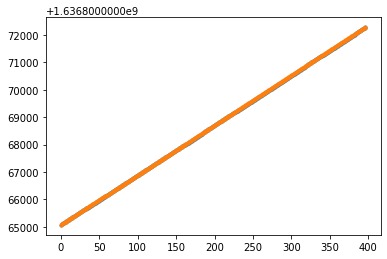

In [207]:
plt.plot(prestart,start, '.')
plt.plot(prestop,stop, '.')

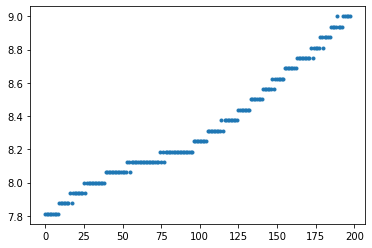

In [180]:
plt.plot(temp, '.')

find directories of zeros in time & temperature for a closer look:

In [10]:
import os

def find_zero_T_amb(instrument, path2dir, verbose=False):
    # the directories named by 1st 5 digits of unix time
    unix_day_start = 16348
    unix_day_stop = 16395

    def find_zero(day):
        for hour in range(int(day * 1e5), int((day+1)*1e5)):
            if os.path.exists(f'{path2dir}/{day}/{hour}'):
                db = Data.from_directories(directory_addresses=[f'{path2dir}/{day}/{hour}'],
                             classification_catalogue=classification_catalogue,
                             file_catalogue=file_catalogue)

                if len(db[instrument]['Temperature']['time_sys_start']) == len(db[instrument]['Temperature']['temp_ambient']):
                    if len(np.where(db[instrument]['Temperature']['time_sys_start'] < 1e-16)[0])>0:
                        print(hour, len(np.where(db[instrument]['Temperature']['time_sys_start'] < 1e-16)[0]))
        
    for day in range(unix_day_start, unix_day_stop):
        if os.path.exists(f'{path2dir}/{day}'):
            db = Data.from_directories(directory_addresses=[f'{path2dir}/{day}'],
                                         classification_catalogue=classification_catalogue,
                                         file_catalogue=file_catalogue)

            if len(db[instrument]['Temperature']['time_sys_start']) == len(db[instrument]['Temperature']['temp_ambient']):
                if len(np.where(db[instrument]['Temperature']['time_sys_start'] < 1e-16)[0]) > 0:
                    find_zero(day)
            else:
                find_zero(day)

In [152]:
find_zero_T_amb('100MHz', path2dir_100, verbose=False)

1635327453 1
1636879516 2
1638874867 1
1639126216 2
1639155143 1
1639391393 1
